# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.396  1  0.614 0.434 0.003   
                             age        0.058  1  0.090 0.764 0.000   
                             Kiel       2.158  1  3.345 0.069 0.017   
                             Magdeburg  5.616  1  8.704 0.004 0.044   
                             Sweden     8.810  1 13.654 0.000 0.067   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.799  1  0.966 0.327 0.005   
                             age        1.261  1  1.523 0.219 0.008   
                             Kiel       0.022  1  0.027 0.871 0.000   
                             Magdeburg  1.176  1  1.420 0.235 0.007   
                             Sweden    15.880  1 19.179 0.000 0.091   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.362  0.595    False  
                             age               0.117  0.852    False  
                             Kiel              1.161  0.157    False  
                             Magdeburg         2.447  0.015     True  
                             Sweden            3.542  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.485  0.494    False  
                             age               0.660  0.371    False  
                             Kiel              0.060  0.923    False  
                             Magdeburg         0.629  0.392    False  
                             Sweden            4.708  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.671  1  4.206 0.042 0.022   
                             age        0.018  1  0.115 0.735 0.001   
                             Kiel       0.424  1  2.655 0.105 0.014   
                             Magdeburg  0.892  1  5.589 0.019 0.028   
                             Sweden     2.265  1 14.190 0.000 0.069   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.671  1  1.470 0.227 0.008   
                             age        1.130  1  0.622 0.431 0.003   
                             Kiel       8.929  1  4.912 0.028 0.025   
                             Magdeburg 17.412  1  9.579 0.002 0.048   
                             Sweden     0.006  1  0.003 0.956 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.381  0.098    False  
                             age               0.134  0.821    False  
                             Kiel              0.979  0.205    False  
                             Magdeburg         1.719  0.052    False  
                             Sweden            3.658  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.644  0.366    False  
                             age               0.365  0.575    False  
                             Kiel              1.555  0.071    False  
                             Magdeburg         2.645  0.009     True  
                             Sweden            0.020  0.971    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.434         0.362  0.595    False   
                             age       0.764         0.117  0.852    False   
                             Kiel      0.069         1.161  0.157    False   
                             Magdeburg 0.004         2.447  0.015     True   
                             Sweden    0.000         3.542  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.327         0.485  0.494    False   
                             age       0.219         0.660  0.371    False   
                             Kiel      0.871         0.060  0.923    False   
                             Magdeburg 0.235         0.629  0.392    False   
                             Sweden    0.000         4.708  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.042         1.381  0.098    False  
                             age       0.735         0.134  0.821    False  
                             Kiel      0.105         0.979  0.205    False  
                             Magdeburg 0.019         1.719  0.052    False  
                             Sweden    0.000         3.658  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.227         0.644  0.366    False  
                             age       0.431         0.365  0.575    False  
                             Kiel      0.028         1.555  0.071    False  
                             Magdeburg 0.002         2.645  0.009     True  
                             Sweden    0.956         0.020  0.971    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.476     0.338     0.244         2.745     0.310
std       0.302         5.332     0.330     0.296         5.161     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.329     0.016     0.002         0.365     0.008
50%       0.120         0.922     0.239     0.093         1.031     0.186
75%       0.468         2.404     0.624     0.431         2.722     0.575
max       1.000       145.087     1.000     1.000        82.479     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.434         0.362   
A0A024R0T9;K7ER74;P02655                           AD     0.055         1.256   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.131         0.884   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.518         0.286   
A0A075B6H7                                         AD     0.147         0.831   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.028         1.551   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.288         0.540   
S4R3U6                                             AD     0.327         0.485   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.595    False   
A0A024R0T9;K7ER74;P02655                           AD      0.132    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.255    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.666    False   
A0A075B6H7                                         AD      0.279    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.317    False   
Q9Y6X5                                             AD      0.077    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.453    False   
S4R3U6                                             AD      0.494    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.042         1.381   
A0A024R0T9;K7ER74;P02655                           AD     0.035         1.451   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.410         0.387   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.310         0.508   
A0A075B6H7                                         AD     0.042         1.376   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.035         1.457   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.881         0.055   
S4R3U6                                             AD     0.227         0.644   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.098    False  
A0A024R0T9;K7ER74;P02655                           AD      0.086    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.556    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.461    False  
A0A075B6H7                                         AD      0.099    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.256         1.397     0.339     0.243         1.505     0.315
std       0.293         1.635     0.318     0.287         1.767     0.312
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.012         0.362     0.041     0.009         0.374     0.027
50%       0.120         0.921     0.240     0.103         0.989     0.201
75%       0.435         1.904     0.596     0.423         2.064     0.567
max       1.000        24.061     1.000     0.999        23.809     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1036,986


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.434         0.362  0.595   
A0A024R0T9;K7ER74;P02655                           0.055         1.256  0.132   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.131         0.884  0.255   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.518         0.286  0.666   
A0A075B6H7                                         0.147         0.831  0.279   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.317   
Q9Y6X5                                             0.028         1.551  0.077   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.288         0.540  0.453   
S4R3U6                                             0.327         0.485  0.494   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.042   
A0A024R0T9;K7ER74;P02655                              False 0.035   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.410   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.310   
A0A075B6H7                                            False 0.042   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.035   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.881   
S4R3U6                                                False 0.227   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.381  0.098   
A0A024R0T9;K7ER74;P02655                                   1.451  0.086   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.387  0.556   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.508  0.461   
A0A075B6H7                                                 1.376  0.099   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.457  0.085   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.055  0.925   
S4R3U6                                                     0.644  0.366   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    956
PI (yes) - QRILC (yes)   355
PI (no)  - QRILC (yes)    80
PI (yes) - QRILC (no)     30
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.030         1.526  0.081    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2    0.000         3.621  0.001     True   
A0A087WWT2;Q9NPD7                        0.046         1.335  0.114    False   
A0A087X0M8                               0.024         1.627  0.068    False   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.010         2.018  0.033     True   
...                                        ...           ...    ...      ...   
Q9P0K9                                   0.038         1.423  0.097    False   
Q9UJ14                                   0.035         1.459  0.091    False   
Q9UNW1                                   0.014         1.857  0.044     True   
Q9UP79                                   0.233         0.632  0.390    False   
Q9UQ52                                   0.104         0.983  0.216    False   

                                         QRILC                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.003         2.523  0.011     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2    0.141         0.850  0.257    False   
A0A087WWT2;Q9NPD7                        0.005         2.330  0.016     True   
A0A087X0M8                               0.006         2.195  0.021     True   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.057         1.244  0.125    False   
...                                        ...           ...    ...      ...   
Q9P0K9                                   0.011         1.947  0.034     True   
Q9UJ14                                   0.017         1.772  0.047     True   
Q9UNW1                                   0.162         0.790  0.284    False   
Q9UP79                                   0.005         2.305  0.017     True   
Q9UQ52                                   0.006         2.236  0.020     True   

                                              data  
                                         frequency  
protein groups                                      
A0A075B6I0                                     194  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2          114  
A0A087WWT2;Q9NPD7                              193  
A0A087X0M8                                     189  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2       176  
...                                            ...  
Q9P0K9                                         192  
Q9UJ14                                         169  
Q9UNW1                                         171  
Q9UP79                                         135  
Q9UQ52                                         188  

[110 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.595,0.098,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.132,0.086,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.255,0.556,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.666,0.461,196,PI (no) - QRILC (no)
A0A075B6H7,0.279,0.099,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.317,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.077,0.085,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.972,0.015,86,PI (no) - QRILC (yes),0.957
P43004;P43004-2;P43004-3,0.881,0.012,89,PI (no) - QRILC (yes),0.869
J3KSJ8;Q9UD71;Q9UD71-2,0.781,0.001,51,PI (no) - QRILC (yes),0.780
G3V295;G3V3I1;G3V5Z7;P60900,0.668,0.002,95,PI (no) - QRILC (yes),0.666
A0A0J9YW36;Q9NZ72;Q9NZ72-2,0.596,0.048,92,PI (no) - QRILC (yes),0.548
...,...,...,...,...,...
B1AJQ6;Q86Y82,0.046,0.058,49,PI (yes) - QRILC (no),0.013
K7ERI9;P02654,0.041,0.053,196,PI (yes) - QRILC (no),0.012
Q8IUK8,0.044,0.053,191,PI (yes) - QRILC (no),0.009


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


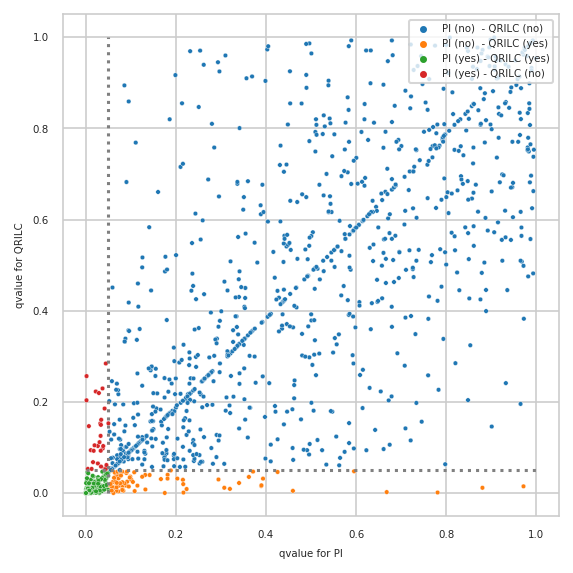

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


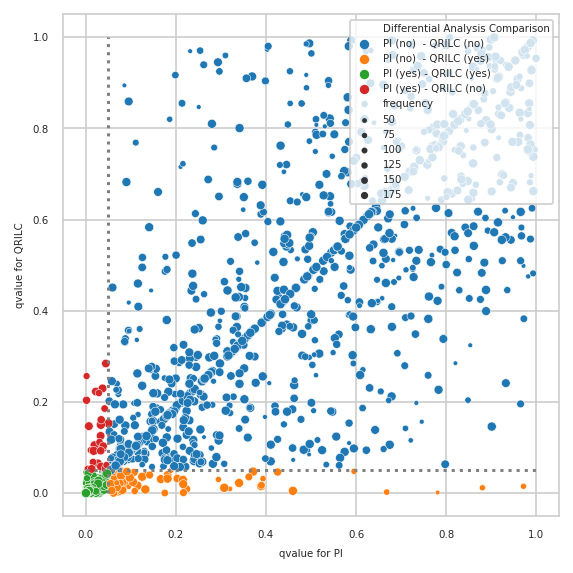

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out